In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

In [ ]:
# Unduh stopwords (jika belum)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Membaca dataset
data = pd.read_excel('calon2.xlsx')  # File input
data.columns = ['full_text', 'sentimen']

In [ ]:
print(data.head())

                                           full_text sentimen
0     Saksikan malam ini AYO DUKUNG DHARMA PONGREKUN  positif
1                        AYO DUKUNG DHARMA PONGREKUN  positif
2  Halo Warga DKI Jakarta.. AYO DUKUNG DHARMA PON...  positif
3  Dengan Majunya Pasangan Dharma Pongrekun dan K...  positif
4  Bakal calon wagub Jakarta jalur independen R K...  positif


In [ ]:
# Inisialisasi Stopwords dan Stemmer
stop_words = set(stopwords.words('indonesian'))
ps = PorterStemmer()

In [ ]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'http\S+|www\S+', '', text)  # Hapus URL
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = text.lower()  # Ubah ke huruf kecil
    return text

In [ ]:
# Fungsi untuk stemming dan menghapus stopwords
def preprocess_text(text):
    text = clean_text(text)
    text = " ".join([ps.stem(word) for word in text.split() if word not in stop_words])  # Stemming dan hapus stopwords
    return text

In [ ]:
# Preprocessing data
data['cleaned_text'] = data['full_text'].apply(preprocess_text)

In [ ]:
print(data.head(46))

                                            full_text sentimen  \
0      Saksikan malam ini AYO DUKUNG DHARMA PONGREKUN  positif   
1                         AYO DUKUNG DHARMA PONGREKUN  positif   
2   Halo Warga DKI Jakarta.. AYO DUKUNG DHARMA PON...  positif   
3   Dengan Majunya Pasangan Dharma Pongrekun dan K...  positif   
4   Bakal calon wagub Jakarta jalur independen R K...  positif   
5   Halo Warga DKI Jakarta.. AYO DUKUNG DHARMA PON...  positif   
6   Halo Warga Daerah Khusus Jakarta AYO DUKUNG DH...  positif   
7   Semoga pasangan independen Calon Gubernur dan ...  positif   
8   Menarik... Dahulu kita memiliki Habibie yang j...  positif   
9   @NarasiNewsroom Panji-Panji. Hati-hati dengan ...  positif   
10  Biar semua terbuka mata dan pikirannya. Bagaim...  positif   
11  Calon Wakil Gubernur Dharma Pongrekun ini luar...  positif   
12  @yaniarsim Para politisi itu hampir swmua pemb...  positif   
13  Bangga memiliki Calon Wakil Gubernur seperti K...  positif   
14  @ainun

In [ ]:
# Memisahkan fitur (teks) dan label (sentimen)
X = data['cleaned_text']
y = data['sentimen']

In [ ]:
# Vectorisasi menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
# Model 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

In [ ]:
# Evaluasi Naive Bayes
print("=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

=== Naive Bayes ===
Accuracy: 0.8701298701298701
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        10
     positif       0.87      1.00      0.93        67

    accuracy                           0.87        77
   macro avg       0.44      0.50      0.47        77
weighted avg       0.76      0.87      0.81        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Model 2: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [ ]:
# Evaluasi SVM
print("\n=== Support Vector Machine (SVM) ===")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))


=== Support Vector Machine (SVM) ===
Accuracy: 0.8701298701298701
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        10
     positif       0.87      1.00      0.93        67

    accuracy                           0.87        77
   macro avg       0.44      0.50      0.47        77
weighted avg       0.76      0.87      0.81        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


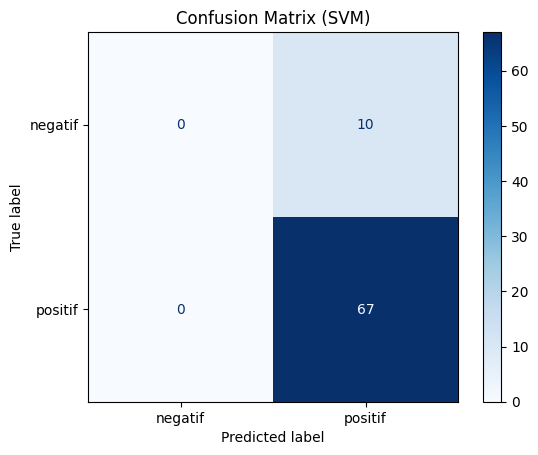

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# === Confusion Matrix ===
cm = confusion_matrix(y_test, svm_predictions, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVM)')
plt.show()

In [ ]:
# === Kata Kunci Berdasarkan Label ===
def get_top_keywords(label, model, vectorizer, X, y, top_n=30):
    idx = y[y == label].index
    word_freq = pd.DataFrame({
        'word': vectorizer.get_feature_names_out(),
        'frequency': X[idx].sum(axis=0).A1
    })
    return word_freq.sort_values(by='frequency', ascending=False).head(top_n)

print("\n=== Kata Kunci Paling Sering Muncul ===")
print("Positif:")
print(get_top_keywords('positif', svm_model, vectorizer, X_vectorized, y))
print("\nNegatif:")
print(get_top_keywords('negatif', svm_model, vectorizer, X_vectorized, y))


=== Kata Kunci Paling Sering Muncul ===
Positif:
            word  frequency
355       dharma  20.673881
1465   pongrekun  20.616237
707      jakarta  13.117377
928          kun  12.619122
1914     wardana  10.775661
469       dukung  10.369086
1946          yg   9.003094
444          dki   8.831281
1434       pilih   7.766358
288        calon   7.480209
883       komjen   7.210999
589     gubernur   6.346652
119         bang   6.192784
22           aja   6.032431
464           dr   5.975407
1916       warga   5.708679
105          ayo   5.564868
1505        purn   5.436927
1457         pol   4.453594
1934          ya   4.078455
1848       tuhan   4.052800
154       beliau   4.017389
665   independen   3.999506
283        cagub   3.999490
1328      partai   3.991933
995         maju   3.777593
1361    pemimpin   3.633196
56           amp   3.364579
611         halo   3.192420
543          gak   3.153996

Negatif:
           word  frequency
355      dharma   4.239789
1465  pongrekun   

In [ ]:
def get_keyword_confidence(model, vectorizer, top_n=50):
    """
    Menghitung confidence kata untuk label positif dan negatif.
    Confidence didasarkan pada koefisien model SVM.
    """
    # Ambil koefisien model
    if hasattr(model, 'coef_'):
        coefficients = model.coef_.toarray()[0]  # Koefisien untuk SVM linear
    else:
        raise ValueError("Model tidak mendukung akses koefisien.")

    # Ambil daftar kata
    words = vectorizer.get_feature_names_out()

    # Gabungkan kata dengan koefisiennya
    word_confidence = pd.DataFrame({
        'word': words,
        'confidence': coefficients
    })

    # Pisahkan ke positif dan negatif
    top_positive = word_confidence.sort_values(by='confidence', ascending=False).head(top_n)
    top_negative = word_confidence.sort_values(by='confidence', ascending=True).head(top_n)

    return top_positive, top_negative


# Ambil confidence untuk kata positif dan negatif
top_positive_confidence, top_negative_confidence = get_keyword_confidence(svm_model, vectorizer)

print("\n=== Kata dengan Confidence Tertinggi (Positif) ===")
print(top_positive_confidence)

print("\n=== Kata dengan Confidence Tertinggi (Negatif) ===")
print(top_negative_confidence)



=== Kata dengan Confidence Tertinggi (Positif) ===
                 word  confidence
1434            pilih    0.729393
1208             ndan    0.672359
1246            nomor    0.546237
143              bayi    0.528075
119              bang    0.524460
469            dukung    0.505202
288             calon    0.431558
1934               ya    0.424121
1832           tolong    0.413848
357   dharmapongrekun    0.400703
1492          program    0.399877
1843             tuan    0.387008
1054          memilih    0.379117
1457              pol    0.379097
567              gini    0.375158
114              bagu    0.370356
1621           semoga    0.361538
1618         semangat    0.344813
564              gila    0.332551
1009          mantapp    0.332542
841             keren    0.332530
587               gua    0.328895
1361         pemimpin    0.327054
493               emg    0.324508
1746              tau    0.316890
492             embel    0.316563
1064           menang    0.314

In [ ]:
# === Prediksi Tweet Baru ===
def predict_new_tweet(tweet, vectorizer, model):
    processed_tweet = preprocess_text(tweet)
    tweet_vectorized = vectorizer.transform([processed_tweet])
    prediction = model.predict(tweet_vectorized)[0]
    return prediction

In [ ]:
# Input user untuk tweet baru
new_tweet = input("\nMasukkan tweet baru untuk prediksi: ")
sentiment = predict_new_tweet(new_tweet, vectorizer, svm_model)
print(f"Prediksi sentimen untuk tweet: '{new_tweet}' adalah: {sentiment}")


Masukkan tweet baru untuk prediksi: jagoan
Prediksi sentimen untuk tweet: 'jagoan' adalah: negatif


In [ ]:
from google.colab import files # Import the 'files' object from the 'google.colab' module.
# Simpan hasil preprocessing dan kata kunci ke file Excel
data[['full_text', 'cleaned_text', 'Sentimen']].to_excel('preprocessed_data_calon2.xlsx', index=False)

files.download('preprocessed_data_calon2.xlsx') # Now 'files' is defined and can be used.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>